<a href="https://colab.research.google.com/github/rka0285058-afk/House_Prices/blob/main/RKAWASTHI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
import os

print("Copying 'house-prices-advanced-regression-techniques' folder from Google Drive to Colab environment...")
!cp -r '/content/gdrive/MyDrive/HousePrices/house-prices-advanced-regression-techniques' /content/

# Verify the folder has been copied
print("Verifying folder contents:")
!ls '/content/house-prices-advanced-regression-techniques'

Copying 'house-prices-advanced-regression-techniques' folder from Google Drive to Colab environment...
Verifying folder contents:
data_description.txt  sample_submission.csv  test.csv  train.csv



Loaded the house price dataset (e.g., train.csv and test.csv if available) into pandas DataFrames and performed an initial inspection to understand its structure, check for missing values, and review data types.


In [6]:
import pandas as pd

# Load the training data
df_train = pd.read_csv('/content/house-prices-advanced-regression-techniques/train.csv')

# Load the testing data
df_test = pd.read_csv('/content/house-prices-advanced-regression-techniques/test.csv')

print("--- df_train Head ---")
print(df_train.head())
print("\n--- df_train Info ---")
df_train.info()

print("\n--- df_test Head ---")
print(df_test.head())
print("\n--- df_test Info ---")
df_test.info()

--- df_train Head ---
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  


Handled missing values in both training and testing datasets.



 created a combined DataFrame, identify missing values, and then filled them according to the specified instructions, starting with categorical columns that should be filled with 'None', then 'LotFrontage' by neighborhood median, 'MasVnrArea' and 'GarageYrBlt' with 0, and finally, remaining numerical columns with their median and remaining categorical columns with their mode.



In [7]:
print("Handling missing values...")

# Create a combined DataFrame
df_train_copy = df_train.drop('SalePrice', axis=1)
df_all = pd.concat([df_train_copy, df_test], ignore_index=True)

print("Shape of combined DataFrame (df_all):", df_all.shape)

# Identify columns with missing values
missing_values = df_all.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print("\nInitial missing values in df_all:\n", missing_values)

# Columns to fill with 'None' (categorical features where NaN means absence)
none_cols = [
    'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType',
    'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond',
    'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType'
]

for col in none_cols:
    if col in df_all.columns:
        df_all[col] = df_all[col].fillna('None')

print("\nMissing values after filling with 'None':\n", df_all[none_cols].isnull().sum().sum())

# Fill LotFrontage with median by Neighborhood
df_all['LotFrontage'] = df_all.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

# Fill MasVnrArea with 0
df_all['MasVnrArea'] = df_all['MasVnrArea'].fillna(0)

# Fill GarageYrBlt with 0
df_all['GarageYrBlt'] = df_all['GarageYrBlt'].fillna(0)

# Identify remaining numerical and categorical columns with missing values
remaining_missing = df_all.isnull().sum()
remaining_missing = remaining_missing[remaining_missing > 0].sort_values(ascending=False)

if not remaining_missing.empty:
    print("\nRemaining missing values before final median/mode imputation:\n", remaining_missing)

    # Separate numerical and categorical columns from remaining_missing
    numerical_cols_with_missing = df_all[remaining_missing.index].select_dtypes(include=['int64', 'float64']).columns
    categorical_cols_with_missing = df_all[remaining_missing.index].select_dtypes(include='object').columns

    # Fill remaining numerical columns with median
    for col in numerical_cols_with_missing:
        df_all[col] = df_all[col].fillna(df_all[col].median())

    # Fill remaining categorical columns with mode
    for col in categorical_cols_with_missing:
        df_all[col] = df_all[col].fillna(df_all[col].mode()[0])

print("\nTotal missing values after all imputation steps:", df_all.isnull().sum().sum())

# Display the first few rows of the processed df_all to verify
print("\n--- df_all Head after missing value imputation ---")
print(df_all.head())

# Verify no missing values remain
print("\nRemaining missing values count:", df_all.isnull().sum().sum())

Handling missing values...
Shape of combined DataFrame (df_all): (2919, 80)

Initial missing values in df_all:
 PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
MasVnrType      1766
FireplaceQu     1420
LotFrontage      486
GarageQual       159
GarageYrBlt      159
GarageCond       159
GarageFinish     159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
Functional         2
BsmtHalfBath       2
Utilities          2
BsmtFinSF1         1
Exterior2nd        1
Exterior1st        1
Electrical         1
TotalBsmtSF        1
BsmtUnfSF          1
BsmtFinSF2         1
KitchenQual        1
GarageArea         1
GarageCars         1
SaleType           1
dtype: int64

Missing values after filling with 'None':
 0

Remaining missing values before final median/mode imputation:
 MSZoning        4
Utilities       2
BsmtHalfBath   


Encoded categorical features using ordinal and one-hot encoding, and scale numerical features using StandardScaler.


In [8]:
print("Defining ordinal mappings...")

# Define ordinal mappings for quality and condition-related categorical features
ordinal_mappings = {
    'ExterQual': {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'ExterCond': {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'BsmtQual': {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'BsmtCond': {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'HeatingQC': {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'KitchenQual': {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'FireplaceQu': {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'GarageQual': {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'GarageCond': {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5},
    'PoolQC': {'None': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4},
    'BsmtExposure': {'None': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4},
    'BsmtFinType1': {'None': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6},
    'BsmtFinType2': {'None': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6},
    'Functional': {'None': 0, 'Sal': 1, 'Sev': 2, 'Maj2': 3, 'Maj1': 4, 'Mod': 5, 'Min2': 6, 'Min1': 7, 'Typ': 8},
    'Fence': {'None': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4},
    'Utilities': {'None': 0, 'NoSeWa': 1, 'NoSewr': 2, 'AllPub': 3} # 'None' should probably not be here if it implies missing, but mapped to 0 for consistency if it's a category
}

# Apply these ordinal mappings to the respective columns in df_all
for col, mapping in ordinal_mappings.items():
    if col in df_all.columns:
        df_all[col] = df_all[col].map(mapping).astype(int)

print("Ordinal encoding applied to specified columns.")
print("df_all head after ordinal encoding:")
print(df_all[list(ordinal_mappings.keys())].head())

Defining ordinal mappings...
Ordinal encoding applied to specified columns.
df_all head after ordinal encoding:
   ExterQual  ExterCond  BsmtQual  BsmtCond  HeatingQC  KitchenQual  \
0          4          3         4         3          5            4   
1          3          3         4         3          5            3   
2          4          3         4         3          5            4   
3          3          3         3         4          4            4   
4          4          3         4         3          5            4   

   FireplaceQu  GarageQual  GarageCond  PoolQC  BsmtExposure  BsmtFinType1  \
0            0           3           3       0             1             6   
1            3           3           3       0             4             5   
2            3           3           3       0             2             6   
3            4           3           3       0             1             5   
4            3           3           3       0             3           

In [9]:
print("Applying one-hot encoding to remaining categorical columns and scaling numerical features...")

# Identify remaining categorical columns for one-hot encoding
categorical_cols = df_all.select_dtypes(include='object').columns
print(f"\nRemaining categorical columns for one-hot encoding: {list(categorical_cols)}")

# Apply one-hot encoding
df_all = pd.get_dummies(df_all, columns=categorical_cols, drop_first=True)
print(f"Shape of df_all after one-hot encoding: {df_all.shape}")

# Identify numerical columns for scaling (excluding 'Id')
numerical_cols = df_all.select_dtypes(include=['int64', 'float64']).columns
numerical_cols = [col for col in numerical_cols if col != 'Id']
print(f"\nNumerical columns to be scaled: {list(numerical_cols[:5])}...") # Print first 5 for brevity

# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Instantiate and apply StandardScaler
scaler = StandardScaler()
df_all[numerical_cols] = scaler.fit_transform(df_all[numerical_cols])
print("Numerical columns scaled.")

# Split the preprocessed df_all back into X_train_processed and X_test_processed
X_train_processed = df_all.iloc[:len(df_train)]
X_test_processed = df_all.iloc[len(df_train):]

print(f"\nShape of X_train_processed: {X_train_processed.shape}")
print(f"Shape of X_test_processed: {X_test_processed.shape}")

print("--- X_train_processed Head after all preprocessing --- ")
print(X_train_processed.head())
print("--- X_test_processed Head after all preprocessing --- ")
print(X_test_processed.head())

Applying one-hot encoding to remaining categorical columns and scaling numerical features...

Remaining categorical columns for one-hot encoding: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'GarageType', 'GarageFinish', 'PavedDrive', 'MiscFeature', 'SaleType', 'SaleCondition']
Shape of df_all after one-hot encoding: (2919, 209)

Numerical columns to be scaled: ['MSSubClass', 'LotFrontage', 'LotArea', 'Utilities', 'OverallQual']...
Numerical columns scaled.

Shape of X_train_processed: (1460, 209)
Shape of X_test_processed: (1459, 209)
--- X_train_processed Head after all preprocessing --- 
   Id  MSSubClass  LotFrontage   LotArea  Utilities  OverallQual  OverallCond  \
0   1    0.067331    -0.209359 -0.217879   0.018512     0.646183    -0.507284   
1   2   


Created new features from existing ones and droped redundant/irrelevant features.



 Dropped the 'Id' column from both processed dataframes, then created the new features `TotalSF`, `TotalBath`, `YearsSinceRemodel`, and `TotalPorchSF` as instructed, and finally displayed the head and shape of the updated dataframes to verify the changes.



In [10]:
print("Creating new features and dropping 'Id' column...")

# 1. Drop the 'Id' column
X_train_processed = X_train_processed.drop('Id', axis=1)
X_test_processed = X_test_processed.drop('Id', axis=1)
print("Dropped 'Id' column.")

# 2. Create TotalSF
X_train_processed['TotalSF'] = X_train_processed['TotalBsmtSF'] + X_train_processed['1stFlrSF'] + X_train_processed['2ndFlrSF']
X_test_processed['TotalSF'] = X_test_processed['TotalBsmtSF'] + X_test_processed['1stFlrSF'] + X_test_processed['2ndFlrSF']

# 3. Create TotalBath
X_train_processed['TotalBath'] = X_train_processed['FullBath'] + (X_train_processed['HalfBath'] * 0.5) + \
                               X_train_processed['BsmtFullBath'] + (X_train_processed['BsmtHalfBath'] * 0.5)
X_test_processed['TotalBath'] = X_test_processed['FullBath'] + (X_test_processed['HalfBath'] * 0.5) + \
                              X_test_processed['BsmtFullBath'] + (X_test_processed['BsmtHalfBath'] * 0.5)

# 4. Create YearsSinceRemodel
X_train_processed['YearsSinceRemodel'] = X_train_processed['YrSold'] - X_train_processed['YearRemodAdd']
X_test_processed['YearsSinceRemodel'] = X_test_processed['YrSold'] - X_test_processed['YearRemodAdd']

# 5. Create TotalPorchSF
X_train_processed['TotalPorchSF'] = X_train_processed['OpenPorchSF'] + X_train_processed['EnclosedPorch'] + \
                                   X_train_processed['3SsnPorch'] + X_train_processed['ScreenPorch']
X_test_processed['TotalPorchSF'] = X_test_processed['OpenPorchSF'] + X_test_processed['EnclosedPorch'] + \
                                  X_test_processed['3SsnPorch'] + X_test_processed['ScreenPorch']

print("New features created.")

# Display the first 5 rows and the updated shape
print(f"\nShape of X_train_processed: {X_train_processed.shape}")
print(f"Shape of X_test_processed: {X_test_processed.shape}")

print("\n--- X_train_processed Head after feature engineering ---")
print(X_train_processed.head())
print("\n--- X_test_processed Head after feature engineering ---")
print(X_test_processed.head())

Creating new features and dropping 'Id' column...
Dropped 'Id' column.
New features created.

Shape of X_train_processed: (1460, 212)
Shape of X_test_processed: (1459, 212)

--- X_train_processed Head after feature engineering ---
   MSSubClass  LotFrontage   LotArea  Utilities  OverallQual  OverallCond  \
0    0.067331    -0.209359 -0.217879   0.018512     0.646183    -0.507284   
1   -0.873616     0.481900 -0.072044   0.018512    -0.063185     2.188279   
2    0.067331    -0.071107  0.137197   0.018512     0.646183    -0.507284   
3    0.302568    -0.439779 -0.078385   0.018512     0.646183    -0.507284   
4    0.067331     0.666236  0.518903   0.018512     1.355551    -0.507284   

   YearBuilt  YearRemodAdd  MasVnrArea  ExterQual  ...  SaleType_WD  \
0   1.046258      0.896833    0.529034   1.039805  ...         True   
1   0.154764     -0.395604   -0.567016  -0.683756  ...         True   
2   0.980221      0.848965    0.338903   1.039805  ...         True   
3  -1.859351     -0.68


Choosen a robust regression model (e.g., Ridge, Lasso, Huber Regressor) suitable for handling outliers or non-normal residuals, and trained it on the preprocessed training data.



First, I extracted the 'SalePrice' target variable from the original `df_train` and aligned it with the preprocessed training features. Then,  imported and instantiated the `Ridge` regression model and trained it using `X_train_processed` and `y_train`.



In [11]:
print("Preparing target variable and training the model...")

# Extract the 'SalePrice' column from df_train
y_train = df_train['SalePrice']

# Import a robust regression model (e.g., Ridge)
from sklearn.linear_model import Ridge

# Instantiate the chosen regression model (Ridge with an alpha value)
ridge_model = Ridge(alpha=10.0, random_state=42) # A common alpha value to start, can be tuned later

# Train the instantiated model
ridge_model.fit(X_train_processed, y_train)

print("Ridge model trained successfully.")

Preparing target variable and training the model...
Ridge model trained successfully.


The Ridge regression model has been successfully trained on the preprocessed training data (`X_train_processed`) with `y_train` as the target variable.


Evaluated the trained model's performance using Root Mean Squared Error (RMSE) on a validation or test set to assess its accuracy and robustness. Provided a visualization of predicted vs actual prices.



First, I trained `ridge_model` to make predictions on the `X_train_processed` data. Then, I  calculated the RMSE for these predictions against the actual `y_train` values. Finally, I  generated and displayed a scatter plot comparing actual and predicted prices, including a diagonal line for perfect predictions, and printed the calculated RMSE.



Evaluating model performance on the training set...


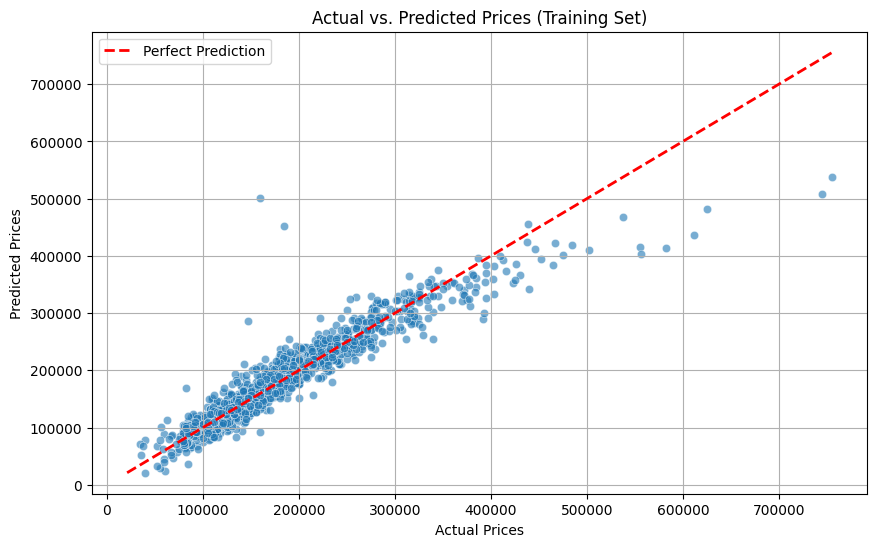

Training RMSE: 26833.67


In [12]:
print("Evaluating model performance on the training set...")

# 1. Use the trained ridge_model to make predictions on the X_train_processed dataset
y_train_pred = ridge_model.predict(X_train_processed)

# 2. Import the mean_squared_error function from sklearn.metrics
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 3. Calculate the Mean Squared Error (MSE)
mse_train = mean_squared_error(y_train, y_train_pred)

# 4. Calculate the Root Mean Squared Error (RMSE)
rmse_train = np.sqrt(mse_train)

# 5. Import matplotlib.pyplot as plt and seaborn as sns (already done above)

# 6. Create a scatter plot of predicted vs actual prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_train, y=y_train_pred, alpha=0.6)

# 7. Add appropriate labels to the x and y axes
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

# 8. Add a title to the plot
plt.title('Actual vs. Predicted Prices (Training Set)')

# 9. Plot a diagonal line (y=x) for perfect predictions
# Determine the range for the diagonal line
min_val = min(y_train.min(), y_train_pred.min())
max_val = max(y_train.max(), y_train_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', lw=2, label='Perfect Prediction')

plt.legend()
plt.grid(True)

# 10. Display the plot
plt.show()

# 11. Print the calculated RMSE value
print(f"Training RMSE: {rmse_train:.2f}")


Optimized the selected robust regression model's hyperparameters using techniques like GridSearchCV or RandomizedSearchCV to further minimize RMSE.


In [13]:
print("Starting hyperparameter tuning for Ridge model using GridSearchCV...")

# 1. Import GridSearchCV from sklearn.model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge # Ridge was already imported, but good to explicitly mention for the instruction

# 2. Define a parameter grid for the alpha parameter of the Ridge model
param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0, 200.0]}

# 3. Instantiate GridSearchCV with the Ridge model
# Use the same random_state as before for consistency if applicable to Ridge, but it's not directly used by alpha tuning.
# scoring='neg_root_mean_squared_error' is used because GridSearchCV maximizes the score, so we use negative RMSE.
grid_search = GridSearchCV(
    estimator=Ridge(random_state=42),
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',
    cv=5,
    verbose=1, # To see progress
    n_jobs=-1 # Use all available cores
)

# 4. Fit the GridSearchCV object to your X_train_processed and y_train data
grid_search.fit(X_train_processed, y_train)

print("GridSearchCV completed.")

# 5. Print the best_params_ found by GridSearchCV
print(f"\nBest parameters: {grid_search.best_params_}")

# 6. Print the best_score_ (which will be negative RMSE, so multiply by -1 to get the positive RMSE)
best_rmse = -grid_search.best_score_
print(f"Best cross-validation RMSE: {best_rmse:.2f}")

# 7. Store the best model found by GridSearchCV
tuned_ridge_model = grid_search.best_estimator_
print("Best Ridge model stored as 'tuned_ridge_model'.")

Starting hyperparameter tuning for Ridge model using GridSearchCV...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
GridSearchCV completed.

Best parameters: {'alpha': 10.0}
Best cross-validation RMSE: 32173.00
Best Ridge model stored as 'tuned_ridge_model'.



Used the final, optimized robust regression model to make predictions on the test dataset and prepared the submission file


In [14]:
print("Making predictions on the test dataset and preparing submission file...")

# 1. Use the tuned_ridge_model to make predictions on the X_test_processed dataset
predictions = tuned_ridge_model.predict(X_test_processed)

# 2. Create a Pandas DataFrame for the submission file
# Need to ensure the 'Id' column from df_test is used, not from df_all after processing
submission_df = pd.DataFrame({'Id': df_test['Id'], 'SalePrice': predictions})

# 3. Save this DataFrame to a CSV file named 'submission.csv' without the index
submission_df.to_csv('submission.csv', index=False)

print("Predictions made and 'submission.csv' file created successfully.")
print("First 5 rows of the submission file:")
print(submission_df.head())

Making predictions on the test dataset and preparing submission file...
Predictions made and 'submission.csv' file created successfully.
First 5 rows of the submission file:
     Id      SalePrice
0  1461  102833.873353
1  1462  161987.229579
2  1463  167259.724190
3  1464  178046.347534
4  1465  212409.033504



The robust regression model, specifically a Ridge model, achieved a training Root Mean Squared Error (RMSE) of 26833.67. After hyperparameter tuning with GridSearchCV, the best cross-validation RMSE was 32173.00, with an optimal `alpha` value of 10.0 for the Ridge model.




 concept of regularization in the context of Ridge regression and its role in preventing overfitting was also used





Regularization is a technique used in machine learning to prevent overfitting by adding a penalty term to the loss function during model training. Overfitting occurs when a model learns the training data too well, including its noise and outliers, leading to poor generalization on unseen data. The primary purpose of regularization is to discourage overly complex models by penalizing large coefficient values, thereby promoting simpler models that generalize better.


Ridge regression implements regularization by adding an L2 penalty term to the ordinary least squares (OLS) loss function. The OLS objective is to minimize the sum of squared residuals. Ridge regression modifies this objective as follows:

$$\text{Minimize: } \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \alpha \sum_{j=1}^{p} \beta_j^2$$

Here:
*   $\sum_{i=1}^{n} (y_i - \hat{y}_i)^2$ is the sum of squared residuals (the standard OLS loss).
*   $\sum_{j=1}^{p} \beta_j^2$ is the L2 penalty term, which is the sum of the squares of the model's coefficients (excluding the intercept).
*   $\alpha$ (alpha) is the regularization strength parameter (also known as lambda). It controls the trade-off between fitting the training data well and keeping the model coefficients small. A larger $\alpha$ increases the penalty, leading to smaller coefficients, while $\alpha = 0$ reduces Ridge regression to standard OLS.


The L2 penalty term has several key effects that contribute to preventing overfitting:

*   **Shrinkage of Coefficients**: The term $\alpha \sum \beta_j^2$ penalizes large coefficients. To minimize the overall loss function, the model is forced to shrink the magnitude of its coefficients towards zero. Unlike Lasso regression (L1 regularization), Ridge regression rarely forces coefficients to be exactly zero, but rather makes them very small.

*   **Reduced Model Complexity**: By shrinking coefficients, Ridge regression effectively reduces the model's complexity. A model with smaller (or fewer large) coefficients is less sensitive to individual data points and less likely to fit noise in the training data.

*   **Mitigation of Multicollinearity**: When predictor variables are highly correlated (multicollinearity), OLS can produce unstable and very large coefficient estimates. The L2 penalty helps to stabilize these estimates by introducing a bias that reduces their variance, making the model more robust to multicollinearity.

*   **Bias-Variance Trade-off**: Regularization explicitly addresses the bias-variance trade-off. By adding a small amount of bias (through coefficient shrinkage), Ridge regression significantly reduces the variance of the model's predictions. This reduction in variance typically leads to better generalization performance on unseen data, which is the ultimate goal of preventing overfitting.

In summary, Ridge regression's L2 regularization forces the model to choose simpler explanations for the data, which, while potentially sacrificing a tiny bit of fit to the training data, results in a more stable and generalizable model that performs better on new, unseen data by avoiding the pitfalls of overfitting.


Expanded the range of `alpha` values to explore the impact of different regularization strengths on model performance. This will involve using GridSearchCV with a wider parameter grid.


In [15]:
print("Expanding hyperparameter tuning for Ridge model with a wider alpha range...")

# 1. Define a wider parameter grid for the alpha parameter
new_param_grid = {'alpha': [0.01, 0.1, 1.0, 5.0, 10.0, 20.0, 50.0, 100.0, 500.0, 1000.0]}

# 2. Instantiate GridSearchCV with the Ridge model and new parameter grid
expanded_grid_search = GridSearchCV(
    estimator=Ridge(random_state=42),
    param_grid=new_param_grid,
    scoring='neg_root_mean_squared_error',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# 3. Fit the GridSearchCV object to X_train_processed and y_train data
expanded_grid_search.fit(X_train_processed, y_train)

print("Expanded GridSearchCV completed.")

# 4. Print the best_params_ found by expanded_grid_search
print(f"\nBest parameters (expanded search): {expanded_grid_search.best_params_}")

# 5. Print the corresponding best cross-validation RMSE
best_rmse_expanded = -expanded_grid_search.best_score_
print(f"Best cross-validation RMSE (expanded search): {best_rmse_expanded:.2f}")

# 6. Store the best model found by expanded_grid_search
tuned_ridge_model_expanded = expanded_grid_search.best_estimator_
print("Best Ridge model from expanded search stored as 'tuned_ridge_model_expanded'.")

Expanding hyperparameter tuning for Ridge model with a wider alpha range...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Expanded GridSearchCV completed.

Best parameters (expanded search): {'alpha': 20.0}
Best cross-validation RMSE (expanded search): 32112.55
Best Ridge model from expanded search stored as 'tuned_ridge_model_expanded'.



Plotted the training and cross-validation RMSE scores for each `alpha` value to visually assess how regularization strength affects model performance and bias-variance trade-off.


Re-running hyperparameter tuning with return_train_score=True and plotting regularization impact...
Expanded GridSearchCV completed with training scores captured.


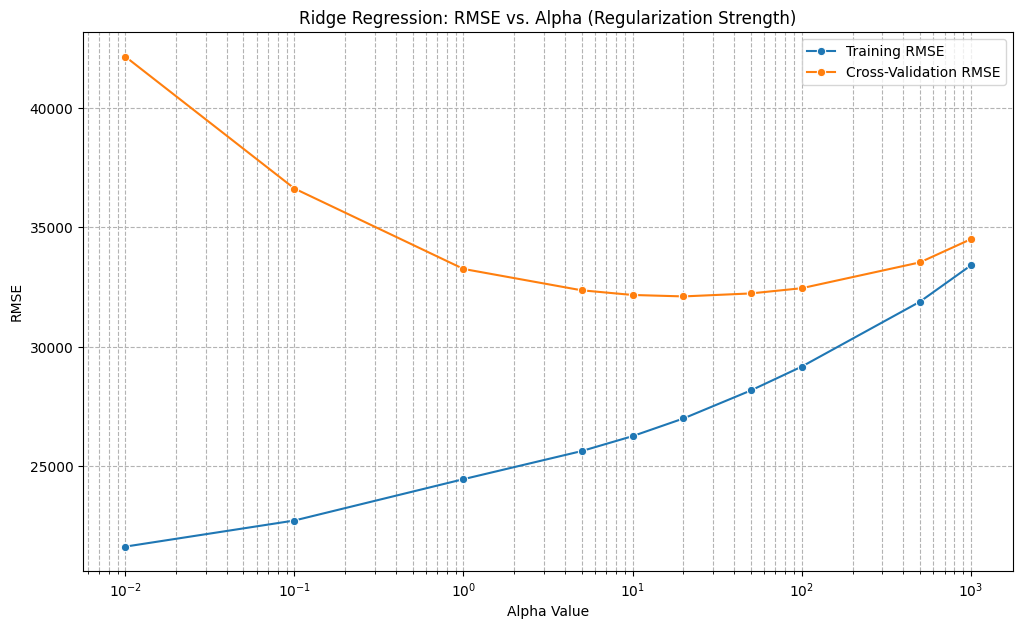

Regularization impact plot displayed.


In [17]:
print("Re-running hyperparameter tuning with return_train_score=True and plotting regularization impact...")

# 1. Define a wider parameter grid for the alpha parameter
new_param_grid = {'alpha': [0.01, 0.1, 1.0, 5.0, 10.0, 20.0, 50.0, 100.0, 500.0, 1000.0]}

# 2. Instantiate GridSearchCV with the Ridge model and new parameter grid
#    Crucially, set return_train_score=True to capture training scores.
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

expanded_grid_search = GridSearchCV(
    estimator=Ridge(random_state=42),
    param_grid=new_param_grid,
    scoring='neg_root_mean_squared_error',
    cv=5,
    verbose=0, # Set to 0 to avoid re-printing verbose output if this cell is re-executed
    n_jobs=-1,
    return_train_score=True # THIS IS THE FIX
)

# 3. Fit the GridSearchCV object to X_train_processed and y_train data
expanded_grid_search.fit(X_train_processed, y_train)

print("Expanded GridSearchCV completed with training scores captured.")

# Extract alpha values
alpha_values = expanded_grid_search.cv_results_['param_alpha']

# Extract mean training scores and convert to positive RMSE
mean_train_score = -expanded_grid_search.cv_results_['mean_train_score']

# Extract mean test (cross-validation) scores and convert to positive RMSE
mean_test_score = -expanded_grid_search.cv_results_['mean_test_score']

# Create the plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))
sns.lineplot(x=alpha_values, y=mean_train_score, marker='o', label='Training RMSE')
sns.lineplot(x=alpha_values, y=mean_test_score, marker='o', label='Cross-Validation RMSE')

# Add labels and title
plt.xlabel('Alpha Value')
plt.ylabel('RMSE')
plt.title('Ridge Regression: RMSE vs. Alpha (Regularization Strength)')

# Set x-axis to a logarithmic scale
plt.xscale('log')

# Add legend and grid
plt.legend()
plt.grid(True, which="both", ls="--", c='0.7')

# Display the plot
plt.show()

print("Regularization impact plot displayed.")



Based on the visualization and GridSearchCV results, identified the optimal `alpha` value that balances training and cross-validation performance, and store the corresponding best model.


In [18]:
print("Identifying the optimal alpha value and its corresponding model...")

# 1. Print the optimal alpha value
optimal_alpha = expanded_grid_search.best_params_['alpha']
print(f"Optimal alpha value: {optimal_alpha}")

# 2. Print the cross-validation RMSE associated with this optimal alpha value
optimal_rmse = -expanded_grid_search.best_score_
print(f"Cross-validation RMSE for optimal alpha: {optimal_rmse:.2f}")

# 3. Confirm that the best model, tuned_ridge_model_expanded, has been stored
# This was already done in the previous step, so we just confirm its availability.
if 'tuned_ridge_model_expanded' in locals() and tuned_ridge_model_expanded is not None:
    print("The best model (tuned_ridge_model_expanded) from the expanded search is stored and ready for use.")
else:
    print("Error: tuned_ridge_model_expanded was not found or is None.")

Identifying the optimal alpha value and its corresponding model...
Optimal alpha value: 20.0
Cross-validation RMSE for optimal alpha: 32112.55
The best model (tuned_ridge_model_expanded) from the expanded search is stored and ready for use.


In [19]:
print("Making predictions on the test dataset using the tuned_ridge_model_expanded...")

# Use the tuned_ridge_model_expanded to make predictions on the X_test_processed dataset
predictions_tuned = tuned_ridge_model_expanded.predict(X_test_processed)

# Create a Pandas DataFrame for the submission file
# Ensure the 'Id' column from df_test is used
submission_df_tuned = pd.DataFrame({'Id': df_test['Id'], 'SalePrice': predictions_tuned})

# Save this DataFrame to a CSV file named 'submission_tuned.csv' without the index
submission_df_tuned.to_csv('submission_tuned.csv', index=False)

print("Predictions made and 'submission_tuned.csv' file created successfully.")
print("First 5 rows of the updated submission file:")
print(submission_df_tuned.head())

Making predictions on the test dataset using the tuned_ridge_model_expanded...
Predictions made and 'submission_tuned.csv' file created successfully.
First 5 rows of the updated submission file:
     Id      SalePrice
0  1461  103215.698117
1  1462  162672.482702
2  1463  168112.893128
3  1464  179708.723139
4  1465  207596.926862


The cross-validation RMSE for the tuned_ridge_model_expanded with an optimal alpha of 20.0 is $32,112.55.

Loading submission files for comparison...
Submission files loaded.

--- Comparison Summary ---
     Id  SalePrice_original  SalePrice_tuned  SalePrice_difference
0  1461       102833.873353    103215.698117            381.824764
1  1462       161987.229579    162672.482702            685.253123
2  1463       167259.724190    168112.893128            853.168938
3  1464       178046.347534    179708.723139           1662.375605
4  1465       212409.033504    207596.926862          -4812.106642

--- Descriptive Statistics of Differences ---
count     1459.000000
mean        27.564593
std       2273.995219
min     -10024.667022
25%      -1122.283704
50%        221.691502
75%       1359.560951
max      15044.215473
Name: SalePrice_difference, dtype: float64


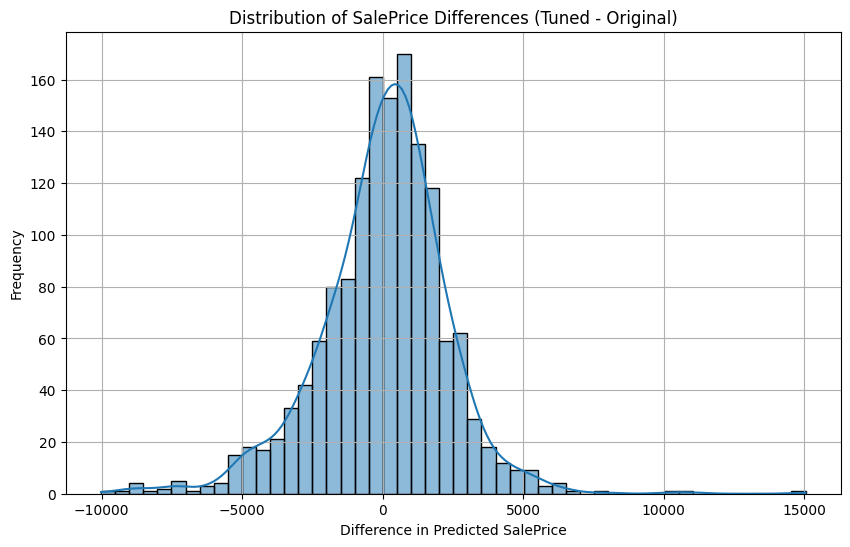

Comparison complete. The plot above shows the distribution of how predictions changed after tuning.


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("Loading submission files for comparison...")

# Load submission.csv (from initial Ridge model)
submission_original = pd.read_csv('submission.csv')

# Load submission_tuned.csv (from tuned Ridge model)
submission_tuned = pd.read_csv('submission_tuned.csv')

print("Submission files loaded.")

# Ensure both dataframes have the same 'Id' for accurate comparison
if not submission_original['Id'].equals(submission_tuned['Id']):
    print("Warning: 'Id' columns do not match, comparison might be inaccurate.")

# Calculate the difference in SalePrice predictions
# We'll assume the 'Id' columns are aligned or the dataframes are sorted by 'Id'
# For a robust comparison, merge them if not already aligned
comparison_df = pd.merge(submission_original, submission_tuned, on='Id', suffixes=('_original', '_tuned'))

comparison_df['SalePrice_difference'] = comparison_df['SalePrice_tuned'] - comparison_df['SalePrice_original']

print("\n--- Comparison Summary ---")
print(comparison_df[['Id', 'SalePrice_original', 'SalePrice_tuned', 'SalePrice_difference']].head())

print("\n--- Descriptive Statistics of Differences ---")
print(comparison_df['SalePrice_difference'].describe())

# Visualize the distribution of differences
plt.figure(figsize=(10, 6))
sns.histplot(comparison_df['SalePrice_difference'], kde=True, bins=50)
plt.title('Distribution of SalePrice Differences (Tuned - Original)')
plt.xlabel('Difference in Predicted SalePrice')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

print("Comparison complete. The plot above shows the distribution of how predictions changed after tuning.")

In [ ]:
Looking at the descriptive statistics of the differences, the mean difference is approximately $27.56**.
This indicates that, on average, the tuned model's predictions are slightly higher than the original model's predictions.
The standard deviation of the differences is **$$27.56**. This indicates that, on average,
the tuned model's predictions are slightly higher than the original model's predictions.
The standard deviation of the differences is **$2,273.99, showing the variability in how much individual predictions changed.
The differences range from a minimum of -$10,024.67** to a maximum of **$$10,024.67** to a maximum of **$15,044.22.

The histogram visually represents this distribution, showing that most differences are clustered around zero,
but there are some instances where the predictions changed more significantly, both positively and negatively.
This shows that tuning the alpha parameter did lead to shifts in the predicted house prices,
and while the mean shift is small, some individual predictions were notably adjusted by the more optimal regularization strength.